## Import the Modules

In [243]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
#from sklearn.model_selection import KFold
#from sklearn.model_selection import GridSearchCV
#from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.tree import export_text
import seaborn as sns
import matplotlib.pyplot as plt

## Display plots

In [244]:
%matplotlib inline

## Import csv file and checking the data

In [245]:
iris_data_columns = ['sepal.length', 'sepal.width', 'PetalLengthCm', 'PetalWidthCm', 'Species']
iris_data = pd.read_csv("iris.csv")
iris_data.head()

,sepal-length,sepal-width,petal-length,petal-width,Species
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa


## Checking for NULL value in CSV

In [246]:
iris_data.isnull().sum()

sepal-length    0
sepal-width     0
petal-length    0
petal-width     0
Species         0
dtype: int64

In [247]:
iris_data.dtypes

sepal-length    float64
sepal-width     float64
petal-length    float64
petal-width     float64
Species          object
dtype: object

## Datatype of each Column

## Create Graph to visualize the relationship between data

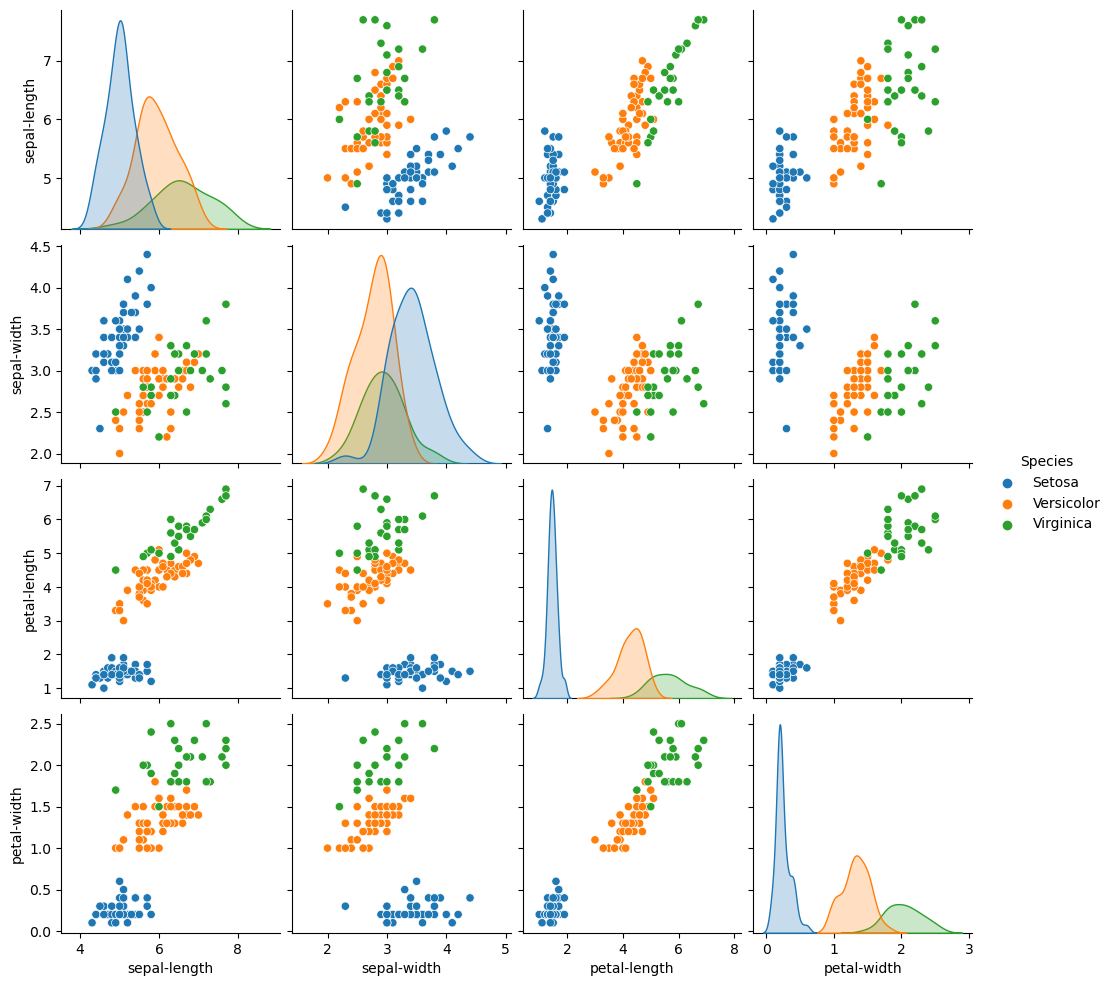

In [248]:
sns.pairplot(iris_data, hue='Species')

## Encoding the 'Species' to numbers
### Setosa - **0**, Versicolor - **1**, Virginica - **2**

In [249]:
class_labels = iris_data['Species'].unique()
encoder = LabelEncoder()
iris_data['Species'] = encoder.fit_transform(iris_data['Species'])
class_labels_encoded = encoder.transform(class_labels)

## Corelation
### 1 => Increase, Increase
### -1 => Increase, Decrease
### 0 => No linear corelation

In [250]:
iris_data.corr()['Species']

sepal-length    0.769716
sepal-width    -0.493027
petal-length    0.950391
petal-width     0.960420
Species         1.000000
Name: Species, dtype: float64

## Comparing the length and width of the petals and sepals of all Species

[Text(0, 0, 'Setosa'), Text(1, 0, 'Versicolor'), Text(2, 0, 'Virginica')]

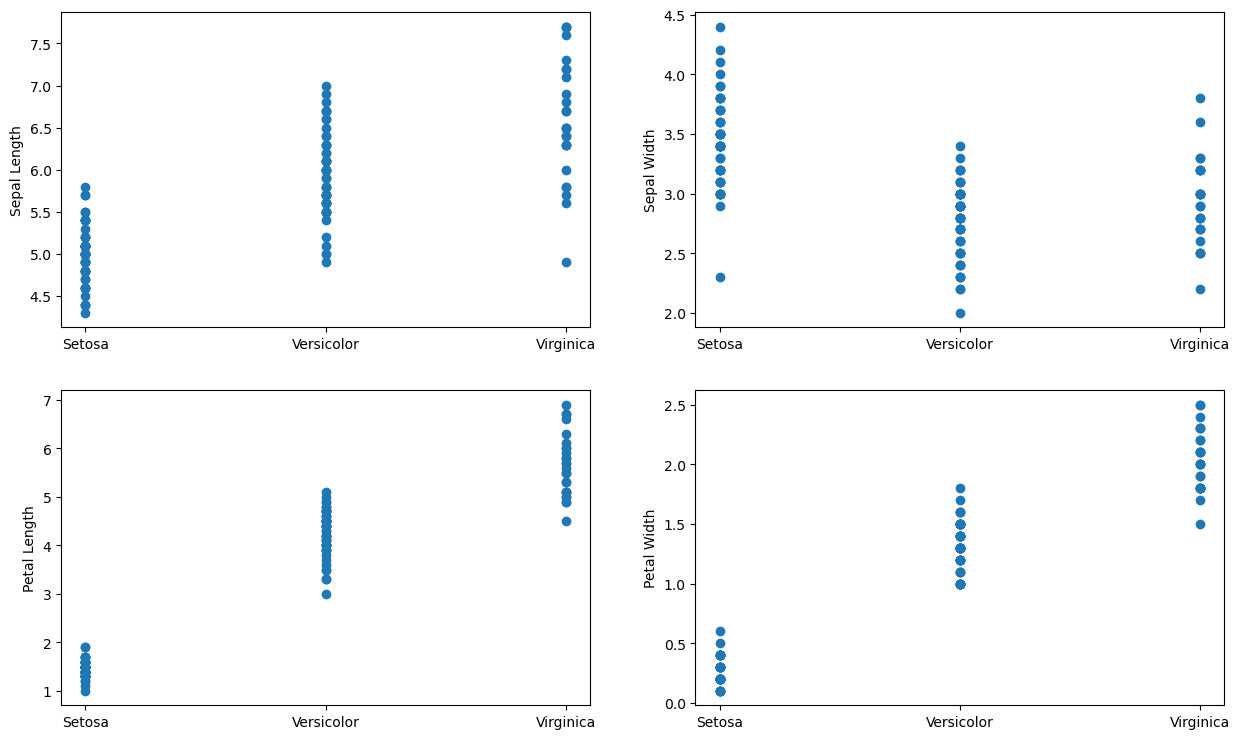

In [251]:
fig,((ax1, ax2), (ax3, ax4)) = plt.subplots(2,2, figsize=(15,9))
 
ax1.scatter(x = iris_data['Species'], y = iris_data['sepal-length'])
ax1.set_ylabel("Sepal Length")
ax1.set_xticks(class_labels_encoded)
ax1.set_xticklabels(class_labels)
 
ax2.scatter(x = iris_data['Species'], y = iris_data['sepal-width'])
ax2.set_ylabel("Sepal Width")
ax2.set_xticks(class_labels_encoded)
ax2.set_xticklabels(class_labels)
 
ax3.scatter(x = iris_data['Species'], y = iris_data['petal-length'])
ax3.set_ylabel("Petal Length")
ax3.set_xticks(class_labels_encoded)
ax3.set_xticklabels(class_labels)
 
ax4.scatter(x = iris_data['Species'], y = iris_data['petal-width'])
ax4.set_ylabel("Petal Width")
ax4.set_xticks(class_labels_encoded)
ax4.set_xticklabels(class_labels)


## Spliting the Data
### 1. data_X --> petal length and width, sepal length and width
### 2. data_y --> Species

In [252]:
data_X = iris_data.drop('Species', axis=1)
data_y = iris_data['Species']

## Training and Testing Data
#### 1. test_size = 0.2 --> Allocating 20% of data for testing and 80% for training
#### 2. random_state = 1 --> for data split in consistency

In [253]:
X_train, X_test, y_train, y_test = train_test_split(data_X, data_y, test_size=0.2, random_state=1)

## Fitting the data

In [254]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## Create Random Forest and classify the dataset

In [255]:
rf_model = RandomForestClassifier(n_estimators=100)
rf_model.fit(X_train, y_train) # learn and build the random trees

RandomForestClassifier()

In [241]:
rf_y_pred = rf_model.predict(X_test)
print('Accuracy Score:', accuracy_score(y_test, rf_y_pred))
print('Confusion Matrix:\n', confusion_matrix(y_test, rf_y_pred))
print('Classification Report:\n', classification_report(y_test, rf_y_pred))

Accuracy Score: 0.8846153846153846
Confusion Matrix:
 [[7 0 0]
 [0 8 0]
 [0 3 8]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         7
           1       0.73      1.00      0.84         8
           2       1.00      0.73      0.84        11

    accuracy                           0.88        26
   macro avg       0.91      0.91      0.89        26
weighted avg       0.92      0.88      0.88        26



In [242]:
individual_trees = rf_model.estimators_

for i, tree in enumerate(individual_trees):
    print(f"Tree {i + 1}:\n")
    tree_text = export_text(tree, feature_names=data_X.columns.tolist(), show_weights=True)
    print(tree_text)
    print("\n")


Tree 1:

|--- petal-length <= -0.48
|   |--- weights: [50.00, 0.00, 0.00] class: 0.0
|--- petal-length >  -0.48
|   |--- petal-width <= 1.02
|   |   |--- weights: [0.00, 33.00, 0.00] class: 1.0
|   |--- petal-width >  1.02
|   |   |--- weights: [0.00, 0.00, 17.00] class: 2.0



Tree 2:

|--- petal-length <= -0.54
|   |--- weights: [45.00, 0.00, 0.00] class: 0.0
|--- petal-length >  -0.54
|   |--- petal-width <= 1.09
|   |   |--- weights: [0.00, 38.00, 0.00] class: 1.0
|   |--- petal-width >  1.09
|   |   |--- petal-width <= 1.24
|   |   |   |--- sepal-width <= -0.06
|   |   |   |   |--- weights: [0.00, 0.00, 3.00] class: 2.0
|   |   |   |--- sepal-width >  -0.06
|   |   |   |   |--- weights: [0.00, 1.00, 0.00] class: 1.0
|   |   |--- petal-width >  1.24
|   |   |   |--- weights: [0.00, 0.00, 13.00] class: 2.0



Tree 3:

|--- petal-width <= -0.39
|   |--- weights: [40.00, 0.00, 0.00] class: 0.0
|--- petal-width >  -0.39
|   |--- petal-length <= 1.05
|   |   |--- weights: [0.00, 41.00, 